\title{Lecture 2: Framework of supervised machine learning}
\author{Arvind Suresh}
\date{Jan 27, 2025}

\maketitle

# Last time

## Loading the two datasets

Let's start by again loading the `iris` and `real_estate` datasets. Note that each one actually contains a "train" set and "test" set. We explain what these are and where the names come from later below. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the train data
iris_train = pd.read_csv('../data/classification/iris/train.csv')
real_estate_train = pd.read_csv('../data/regression/real_estate_valuation/train.csv')

# Load the test data
iris_test = pd.read_csv('../data/classification/iris/iris_test_private.csv')
real_estate_test = pd.read_csv('../data/regression/real_estate_valuation/real_estate_valuation_test_private.csv')

## Problems of prediction

We saw last time that ML problems are problems of prediction, and they fall into one of two categories, depending on the nature of the target variable to be predicted:

- *Classification*. 
    - This is when  $Y$ is a categorical variable with finitely many possible values $c_1,\dotsc,c_r$.
    - The values of $Y$ partition the instances into $r$ classes. 
    - Predicting $Y$ amounts to classifying the instances, i.e. determining which class the instance lies in.
    - For example, a natural target for `iris` is `class`; given a particular iris flower, one wants to classify it as belonging to one of the three classes (`Iris-setosa`, `Iris-virginica`, or `Iris-versicolor`).
- *Regression*.
    - This is when $Y$ is a continuous variable with real values.
    - One wants to predict the value of $Y$ as closely as possible.
    - For example, a natural target for `real_estate` is `Y house price of unit area`; given a particular house, one wants to predict the price per unit area. 

## Labelled and unlabelled datasets

All the datasets loaded above are *labelled*, which means that they contain the target column for all instances. A dataset is *unlabelled* if it does not contain the target column. For example, running the following code will load unlabelled versions of the test set for `iris` and `real_estate`:

```python
iris_test_unlabelled = pd.read_csv('../data/classification/iris/test.csv')
real_estate_test_unlabelled = pd.read_csv('../data/regression/real_estate_valuation/test.csv')
```

Machine Learning falls, broadly speaking, into one of two types:

- Supervised Machine Learning seeks to train models on labelled datasets like `real_estate`, so that they can make predictions on unlabelled datasets like `real_estate_test`. 
- Unsupervised Machine Learning... is postponed until later. 

# Framework of supervised machine learning

## Stating the problem

Suppose we have a labelled dataset `train` with features $X_1,\dotsc,X_n$ and target $Y$, and unlabelled dataset `test` with only the features $X_1,\dotsc,X_n$. Machine Learning begins with:

**Assumption 1.** *There exists some "ground truth function" $\mathbf{F} : \mathbb{R}^n \to \mathbb{R}$ such that*
\begin{equation}
    Y = \mathbf{F}(X_1,\dotsc,X_n) + \epsilon,
\end{equation}
*where $\epsilon$ is a small "noise" term to account for randomness inherent in the problem*. In other words, for every row $P = (x_1,\dotsc,x_n)$ of features in our dataset (thought of as a point in $\mathbb{R}^n$), the entry is the $y$-column is $$\mathbf{F}(P) + \epsilon = \mathbf{F}(x_1,\dotsc,x_n) + \epsilon.$$ Thus, each row of the dataset looks like an ordered pair $(P,\mathbf{F}(P) + \epsilon)$, where $P \in \mathbb{R}^n$ and the $\mathbf{F}(P) + \epsilon \in \mathbb{R}$. 

The domain of $\mathbf{F}$ is called the **feature space**, and the co-domain is the **target space**. Thus, the rows of our dataset can be visualized as a cloud of points; blue points correpond to rows of features $P \in \mathbb{R}^n$, red points correspond to pairs $(P,\mathbf{F}(P) + \epsilon) \in \mathbb{R}^{n+1}$.

<img src="assets/ML-function-diagram.png" width="60%"></img>

The "learn" in machine learning comes from the following formulation of our problem of prediction:

**Goal 1.** *Compute (a good approximation to) the function $\mathbf{F}$. That is, use the labelled dataset to <u>learn</u> the function $\mathbf{F}$*.

**Remark.** In practice, as is the case with `iris_test`, the test set will be labelled. The reason is quite natural- we need data to train our model, but we also need data to test our model's performance on instances which it has not seen during the training (that is, we need to know how well our model generalizes to new instances). Thus, we take our initial labelled data set and split off a portion for testing, and use the other portion for training. Note that, if we want to be able to glean $\mathbf{F}$ by looking at the train set, we require it to be robust enough to create an approximation to $\mathbf{F}$ which *generalizes* well to instances outside the dataset. More on this later. 

## Evaluation metrics

Suppose we have managed to determine a function $F$ that (we believe) approximates $\mathbf{F}$ well, and we write a program to implement this function. Our program accepts a dataset (the test set) with $m$ rows (instances) and columns $X_1,\dotsc,X_n \in \mathbb{R}^m$ (features), and outputs a column vector of predictions $y_{\textup{pred}} \in \mathbb{R}^m$. 

Our claim that $F$ is a good approximation to $\mathbf{F}$ is judged by how closely our prediction vector $y_{\textup{pred}} \in \mathbb{R}^m$  aligns with the vector $y_{\textup{true}} \in \mathbb{R}^m$ of true values in the test set. This measure of closeness is made quantitative and rigorous in the form of a **scoring function**, which associates to the pair $(y_{\textup{pred}},y_{\textup{true}})$ some kind of numerical score $\textup{Score}(y_{\textup{pred}},y_{\textup{true}})$:
$$\textup{Score}(y_{\textup{pred}},y_{\textup{true}}) : \textup{ a number which encodes how closely $y_{\textup{pred}}$ aligns with $y_{\textup{true}}$.}$$

- For classification tasks, a simple (but often not very informative) scoring function is simply  *accuracy score*: it is the fraction of instances that were correctly classified: $$ \textup{Accuracy}(y_{\textup{pred}},y_{\textup{true}}) = \dfrac{\textup{Number of entries where } y_{\textup{pred}} = y_{\textup{true}}}{m}. $$
The greater the accuracy score, the better our model is at making predictions.
- For regression tasks, a simple (and perhaps the most widely used) scoring function is *Mean-squared error*: it is the square of the distance between the vectors $y_{\textup{true}}$ and $y_{\textup{pred}}$ in $\mathbb{R}^m$, and divided by $m$ to (in some sense) account for the fact that there are $m$ entries: $$ \textup{MSE}(y_{\textup{pred}},y_{\textup{true}}) = \dfrac{||{y_{\textup{pred}} - y_{\textup{true}}}||^2}{m}. $$
The smaller the MSE, the better our model is at making predictions. 

**Example.** As an example, let's make some random predictions of `class` for the labelled iris test set below and compute the accuracy score. 

In [2]:
# Download the labelled iris test set
iris_test_full = pd.read_csv('../data/classification/iris/iris_test_private.csv')

# Get the classes and display them
classes = iris_test_full['class'].unique().tolist()
print(classes)

# create a vector of true labels
y_true = iris_test_full['class'].values

# Create a column of predictions, sampling uniformly from the classes
y_pred = np.random.choice(classes, size=iris_test.shape[0])

# Create a vector with 1 for correct predictions and 0 for incorrect predictions
correct = y_true == y_pred

#compute and display the accuracy
accuracy = correct.mean()
print(f'Accuracy: {accuracy:.2f}')

# display predictions, true values, correctness
pd.DataFrame({'true': y_true, 'pred': y_pred, 'correct': correct})

['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
Accuracy: 0.37


,true,pred,correct
0,Iris-setosa,Iris-setosa,True
1,Iris-virginica,Iris-setosa,False
2,Iris-versicolor,Iris-virginica,False
3,Iris-versicolor,Iris-virginica,False
4,Iris-setosa,Iris-virginica,False
5,Iris-versicolor,Iris-setosa,False
6,Iris-setosa,Iris-versicolor,False
7,Iris-setosa,Iris-setosa,True
8,Iris-virginica,Iris-virginica,True
9,Iris-versicolor,Iris-setosa,False


Running the above code many times changes the predictions and accuracy because the function `np.random.choice` is generating the predictions randomly. In general, you should be seeing that the accuracy is typically below $0.5$, meaning that less than $50\%$ of the random predictions were correct!

## What is a ML model?

OK. We want to learn this hypothetical function $\mathbf{F}$? How? In fact, what does it even mean to "know" the function $\mathbf{F}$? 

The answer is tautological: knowing the function means that, given an input, we can compute the output. That is, knowing $\mathbf{F}$ means that we know the *formula* which defines $\mathbf{F}$, if such a formula at all exists, or more generally, we know an algorithm for computing outputs of $\mathbf{F}$.

Since there is a vast, vast jungle of possible functions, our starting point is always to first study the labelled dataset to explore any visible patterns in the data; this is known as *exploratory data analysis*, or EDA. A thorough and fruitful exploration of the data will allow us to narrow our search by making:

**Assumption 2.** *There is a certain <u>class</u> of functions $\mathcal{C}$ (called a **model**) such that some member $F \in \mathcal{C}$ is a good approximation to $\mathbf{F}$.*

The word model above is used in the mathematical sense; it refers to a family of functions that are all similar in some respect, for example, linear, logistic, exponential, polynomial, trigonometric, and so on. We also call them **machine learning models**. 

Now, given assumption 2, we have a model $\mathcal{C}$ consisting of candidates for our approximation of $\mathbf{F}$. Then, our problem is re-phrased as:

**Goal 2.** *Produce the particular function $\hat{F}$ in the chosen model $\mathcal{C}$ which best approximates $\mathbf{F}$ among all functions in $\mathcal{C}$.* 

## Model parameters

The examples of models given above are all **parametric models**: each model consists of functions having the same type of formula. These formulas involve constants, which are called **parameters**, and varying the parameters results in varying the function within the model. 

Suppose for example that we have just one feature $X$ and one target $Y$, both continuous. The simplest possible model is the *linear model*: $$\mathcal{C}_{linear} = \{ \textup{Functions of the form } F(X) = mX + b \}.$$ The model parameters here are pairs of real numbers $m$ and $b$, which can be grouped together and viewed as a single point $\theta = (m,b) \in \mathbb{R}^2$. This point corresponds to the linear function $F_{\theta}(X) = mX + b$. For example, the point $\theta = (1,1)$ corresponds to $F_{\theta}(X) = X + 1$. In fact, we have a bijection
\begin{align*}
    \mathbb{R}^2 & \leftrightarrow \mathcal{C}_{linear},\\
    \theta & \mapsto F_{\theta}(X).
\end{align*}
So, we want to think of the model $\mathcal{C}_{linear}$ itself as $\mathbb{R}^2$, which is typically referred to as the *parameter space*. Goal 2 of finding the best approximation to $\mathbf{F}$ within $\mathcal{C}_{linear}$ amounts to finding a special point $\hat{\theta}$ in the parameter space. In general, we can reformulate our goal as:

**Goal 3.** *Produce the particular value $\hat{\theta}$ of the parameters such that the corresponding function $F_{\hat{\theta}}$ is the best approximation to $\mathbf{F}$ within the model $\mathcal{C}$.* 

## Model parameters
The heart of supervised ML is the problem of accomplishing goal 3 and finding the parameters $\hat{\theta}$ resulting in the *best* approximation $F_{\hat{\theta}}$ to $\mathbf{F}$. To make sense of the phrase "best", we first need a way to measure the goodness of a particular approximation $F_{\theta}$. This is accomplished by means of a **loss function**:

A loss function is a real-valued function of the parameters, denoted $J(\theta)$, which measures how well the corresponding function $F_{\theta}$ approximates $\mathbf{F}$ *on the train set*. Any choice of parameters $\theta$ allows us to produce a vector of predictions $$y_{\textup{pred},\theta} = F_{\theta}(X_1,\dotsc,X_n) \in \mathbb{R}^r,$$ where $r$ denotes the number of instances of the train set. (Above, I've added the subscript $\theta$ to emphasize that the predictions change with $\theta$.) Similar to the evaluation metric, the loss function $J$ is a measure of how closely the predictions $y_{\textup{pred},\theta} \in \mathbb{R}^r$ align with the true values $y_{\textup{true}} \in \mathbb{R}^r$. 

A key difference, however, is that we view the loss as a function of the parameters, not of the data! This is quite natural: for the same fixed dataset, varying $\theta$ will vary the prediction vector $y_{\textup{pred},\theta}$, which causes the loss $J$ between $y_{\textup{true}}$ and $y_{\textup{pred},\theta}$ to also vary. Choosing a useful loss function is one of the most important steps in building a good model. Often, one simply wants to take the loss to be the same as the evaluation metric (as we'll see, this won't always work). 

**Example.** Returning back to the simple linear regression example with one feature $X$ and target $Y$, we could choose our loss function to be MSE. For a particular choice of parameters $\theta = (m,b) \in \mathbb{R}^2$, our function looks like $$F_{\theta}(X) = mX + b.$$ 
    Thus, if $X = [x_1 \, \dotsc \, x_r]^t \in \mathbb{R}^r$ (the $t$ stands for transpose), then 
our vector of predictions is simply $$y_{\textup{pred},\theta} = \begin{bmatrix} mx_1 + b \\ \vdots \\ mx_r + b \end{bmatrix} \in \mathbb{R}^r.$$ Using MSE as our loss function, we have
\begin{align*}
J(\theta) & = \textup{MSE} (y_{\textup{pred},\theta},y_{\textup{true}})\\
        & = \dfrac{|| y_{\textup{pred},\theta} - y_{\textup{true}}||^2}{r}\\
        & = \dfrac{1}{r} \sum_{i=1}^r (mx_i + b - y_i)^2,
\end{align*}
which is indeed a function of $\theta = (m,b)$! So, for this toy example, Goal 3 would be restated as: *Find the value of $\theta = (m,b) \in \mathbb{R}^2$ which results in the smallest possible loss $J(\theta)$*.

## Model fitting/training
In general, given a parametric model and a training dataset, **model training** or **model fitting** refers to the act of solving the following optimization problem: *Determine the the **optimum** value of the parameters $\theta$, i.e. the value $\theta = \hat{\theta}$ which results in the smallest possible loss $J(\theta)$.* 

Once $\hat{\theta}$ has been found, we say that the model has been trained on the dataset, or that it has been fit to the dataset. Note that the choice of $\hat{\theta}$ depends on the actual dataset being used for the training, so if more data is added (or removed) then we would expect the fit of the model (i.e. the choice of $\hat{\theta}$) to change!

## Gradient descent



## Summary of a simple machine learning pipeline

A machine learning pipeline refers to a sequence of tasks that are carried out by the programming, beginning with procuring the data, and ending with making predictions and (if relevant) evaluating the model. A typical pipeline may look like so:

- **Data collection.** Procure data (from web, place of work, etc.)
- **Data cleaning.** Process the data into a neat, well-labelled table with feature columns and a target column.
- **EDA.** Explore relationships in the train data with visualizations, statistical tests and so on. Use this analysis to settle on a model for your problem. Also, choose your scoring and loss functions.
- **Train-test-split.** Split off a portion of the data (usually $20\%$) to be used as the test set; the rest of the data will form the train set. <u>Forget about the test set until you're completely and utterly finished with training your model</u>.
- **Model training.** Fit your model to the train set. In many cases (in particular, for complex cases like neural networks), this is accomplished using the method of *gradient descent*... from calculus!
- **Final performance evaluation.** After you are satisfied with the performance of your model on the train set, finally, evaluate the performance by making and scoring predictions on the test set.

In practice, there are additional steps which involve engineering/modifying the features so that the models will work better (more on this later). 

**Example.** The example below implements a simple linear regression model to predict the target variable `Y house price of unit area` from the `real_estate` dataset (this will be our train set). 

Our model F is given by: Y = -0.22854316632099875X + 42.11997584096778
Mean squared error: 170.15


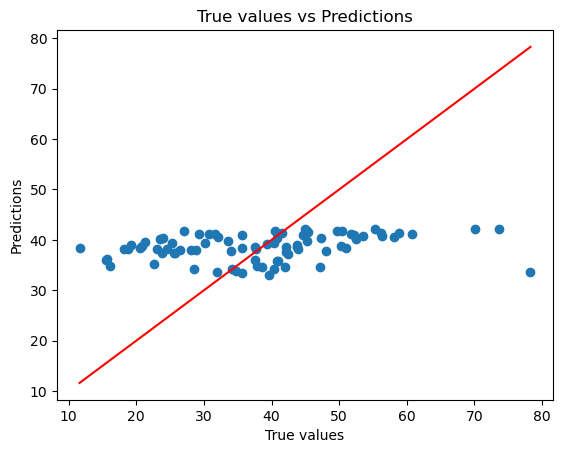

In [3]:
# Implement a simple linear regression model using the real estate dataset

# import the model from sklearn and mse score from sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#get the labelled test set
real_estate_test_full = pd.read_csv('../data/regression/real_estate_valuation/real_estate_valuation_test_private.csv')

# Create the model
model = LinearRegression()

# Choose only the feature X2 house age
X_train = real_estate_train[['X2 house age']]   
y_train = real_estate_train['Y house price of unit area'] #vector of true values in train set
X_test = real_estate_test[['X2 house age']] 
y_test = real_estate_test['Y house price of unit area'] #vector of true values in test set

# Fit the model
model.fit(X_train, y_train)

# Get the coefficients of the fitted model
m = model.coef_[0] #slope of our fitted model
b = model.intercept_ #intercept of our fitted model

# Display the formula for the fitted model
print(f'Our model F is given by: Y = {m}X + {b}')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

#Display the mse
print(f'Mean squared error: {mse:.2f}')

#visualize the column of true values and the column of predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.title('True values vs Predictions')
#plot the line y=x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

As we can see, the model is fared quite poorly: the true values are spread out from $10$ to $80$, but our model basically only predicted values between $30$ and $40$!